In [28]:
import pandas as pd 

data=pd.read_excel('/Users/withmocha/Desktop/TEED/data/mocha/23.09.06/STS.xlsx')

data

,FORCE_A(Big toe),FORCE_B(Right),FORCE_C(Left),FORCE_D(Heel),FORCE_E(Little toe),FORCE_F(Center),X COORDINATE_A(Big toe),X COORDINATE_B(Right),X COORDINATE_C(Left),X COORDINATE_D(Heel),...,Y COORDINATE_E(Little toe),Y COORDINATE_F(Center),COPX,COPY,FSR DATA_A(Big toe),FSR DATA_B(Right),FSR DATA_C(Left),FSR DATA_D(Heel),FSR DATA_E(Little toe),FSR DATA_F(Center)
0,0,0,13,33,0,0,NaN,NaN,2.769231,6.500000,...,NaN,NaN,5.445652,22.260870,18,27,26,33,30,29
1,0,0,13,39,0,0,NaN,NaN,2.769231,6.461538,...,NaN,NaN,5.538462,22.634615,19,27,28,33,30,30
2,0,0,0,42,0,0,NaN,NaN,NaN,6.440476,...,NaN,NaN,6.440476,26.119048,18,28,28,32,30,30
3,0,0,13,42,0,0,NaN,NaN,2.769231,6.452381,...,NaN,NaN,5.581818,22.818182,16,28,27,32,30,28
4,0,0,13,35,0,0,NaN,NaN,2.769231,6.485714,...,NaN,NaN,5.479167,22.218750,14,28,26,33,30,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,24,304,199,0,0,0,8.145833,7.754934,3.261307,NaN,...,NaN,NaN,5.999067,11.688433,34,70,42,26,32,34
609,3,288,169,0,0,0,8.000000,7.805556,3.266272,NaN,...,NaN,NaN,6.050107,11.744136,31,70,41,27,31,34
610,3,285,180,0,0,0,8.000000,7.768421,3.250000,NaN,...,NaN,NaN,5.984144,11.790698,30,66,40,28,31,35
611,0,282,177,0,0,0,NaN,7.787234,3.265537,NaN,...,NaN,NaN,5.984946,11.853763,31,63,41,28,31,37


In [29]:
data.isnull().sum()

FORCE_A(Big toe)                0
FORCE_B(Right)                  0
FORCE_C(Left)                   0
FORCE_D(Heel)                   0
FORCE_E(Little toe)             0
FORCE_F(Center)                 0
X COORDINATE_A(Big toe)       595
X COORDINATE_B(Right)         366
X COORDINATE_C(Left)          149
X COORDINATE_D(Heel)           34
X COORDINATE_E(Little toe)    613
X COORDINATE_F(Center)        377
Y COORDINATE_A(Big toe)       595
Y COORDINATE_B(Right)         366
Y COORDINATE_C(Left)          149
Y COORDINATE_D(Heel)           34
Y COORDINATE_E(Little toe)    613
Y COORDINATE_F(Center)        377
COPX                           20
COPY                           20
FSR DATA_A(Big toe)             0
FSR DATA_B(Right)               0
FSR DATA_C(Left)                0
FSR DATA_D(Heel)                0
FSR DATA_E(Little toe)          0
FSR DATA_F(Center)              0
dtype: int64

In [30]:
data.columns

Index(['FORCE_A(Big toe)', 'FORCE_B(Right)', 'FORCE_C(Left)', 'FORCE_D(Heel)',
       'FORCE_E(Little toe)', 'FORCE_F(Center)', 'X COORDINATE_A(Big toe)',
       'X COORDINATE_B(Right)', 'X COORDINATE_C(Left)', 'X COORDINATE_D(Heel)',
       'X COORDINATE_E(Little toe)', 'X COORDINATE_F(Center)',
       'Y COORDINATE_A(Big toe)', 'Y COORDINATE_B(Right)',
       'Y COORDINATE_C(Left)', 'Y COORDINATE_D(Heel)',
       'Y COORDINATE_E(Little toe)', 'Y COORDINATE_F(Center)', 'COPX', 'COPY',
       'FSR DATA_A(Big toe)', 'FSR DATA_B(Right)', 'FSR DATA_C(Left)',
       'FSR DATA_D(Heel)', 'FSR DATA_E(Little toe)', 'FSR DATA_F(Center)'],
      dtype='object')

In [31]:
data_loss=data.loc[:,['X COORDINATE_C(Left)','X COORDINATE_D(Heel)','Y COORDINATE_C(Left)','Y COORDINATE_D(Heel)']]

In [32]:
data_loss.isnull().sum()

X COORDINATE_C(Left)    149
X COORDINATE_D(Heel)     34
Y COORDINATE_C(Left)    149
Y COORDINATE_D(Heel)     34
dtype: int64

In [33]:
xgb_data_loss_X_COORDINATE_C=data_loss.iloc[:,0].copy()
xgb_data_loss_X_COORDINATE_D=data_loss.iloc[:,1].copy()
xgb_data_loss_Y_COORDINATE_C=data_loss.iloc[:,2].copy()
xgb_data_loss_Y_COORDINATE_D=data_loss.iloc[:,3].copy()

lstm_data_loss_X_COORDINATE_C=data_loss.iloc[:,0].copy()
lstm_data_loss_X_COORDINATE_D=data_loss.iloc[:,1].copy()
lstm_data_loss_Y_COORDINATE_C=data_loss.iloc[:,2].copy()
lstm_data_loss_Y_COORDINATE_D=data_loss.iloc[:,3].copy()

dnn_data_loss_X_COORDINATE_C=data_loss.iloc[:,0].copy()
dnn_data_loss_X_COORDINATE_D=data_loss.iloc[:,1].copy()
dnn_data_loss_Y_COORDINATE_C=data_loss.iloc[:,2].copy()
dnn_data_loss_Y_COORDINATE_D=data_loss.iloc[:,3].copy()

In [34]:
import numpy as np 

index=data_loss.index

loss_index_X_COORDINATE_C=np.array(data_loss.index).reshape(-1,1)[data_loss.iloc[:,0].isna()]
loss_index_X_COORDINATE_D=np.array(data_loss.index).reshape(-1,1)[data_loss.iloc[:,1].isna()]
loss_index_Y_COORDINATE_C=np.array(data_loss.index).reshape(-1,1)[data_loss.iloc[:,2].isna()]
loss_index_Y_COORDINATE_D=np.array(data_loss.index).reshape(-1,1)[data_loss.iloc[:,3].isna()]

normal_index_X_COORDINATE_C=np.setdiff1d(index,loss_index_X_COORDINATE_C)
normal_index_X_COORDINATE_D=np.setdiff1d(index,loss_index_X_COORDINATE_D)
normal_index_Y_COORDINATE_C=np.setdiff1d(index,loss_index_Y_COORDINATE_C)
normal_index_Y_COORDINATE_D=np.setdiff1d(index,loss_index_Y_COORDINATE_D)

In [35]:
import numpy as np 


x_train_X_COORDINATE_C=normal_index_X_COORDINATE_C.reshape(-1,1)
y_train_X_COORDINATE_C=data_loss.iloc[normal_index_X_COORDINATE_C,0]
x_test_X_COORDINATE_C=loss_index_X_COORDINATE_C

x_train_X_COORDINATE_D=normal_index_X_COORDINATE_D.reshape(-1,1)
y_train_X_COORDINATE_D=data_loss.iloc[normal_index_X_COORDINATE_D,1]
x_test_X_COORDINATE_D=loss_index_X_COORDINATE_D

x_train_Y_COORDINATE_C=normal_index_Y_COORDINATE_C.reshape(-1,1)
y_train_Y_COORDINATE_C=data_loss.iloc[normal_index_Y_COORDINATE_C,2]
x_test_Y_COORDINATE_C=loss_index_Y_COORDINATE_C

x_train_Y_COORDINATE_D=normal_index_Y_COORDINATE_D.reshape(-1,1)
y_train_Y_COORDINATE_D=data_loss.iloc[normal_index_Y_COORDINATE_D,3]
x_test_Y_COORDINATE_D=loss_index_Y_COORDINATE_D

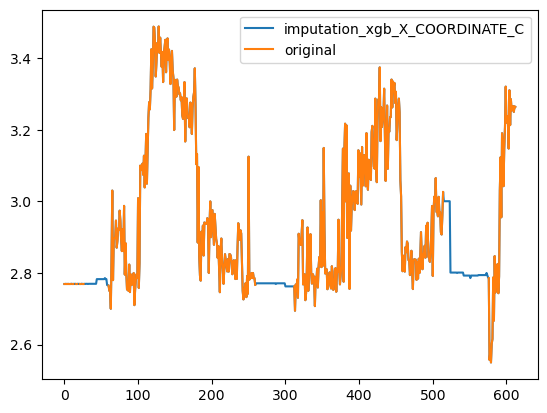

In [36]:
from xgboost.sklearn import XGBRegressor

reg = XGBRegressor().fit(x_train_X_COORDINATE_C,y_train_X_COORDINATE_C)

pred=reg.predict(x_test_X_COORDINATE_C)
pred=pred.reshape(-1,1)

c=0
for i in loss_index_X_COORDINATE_C:    
    xgb_data_loss_X_COORDINATE_C[i]=pred[c]
    c+=1
    

import matplotlib.pyplot as plt 

plt.plot(xgb_data_loss_X_COORDINATE_C,label='imputation_xgb_X_COORDINATE_C')
plt.plot(data_loss.iloc[:,0],label='original')
plt.legend()

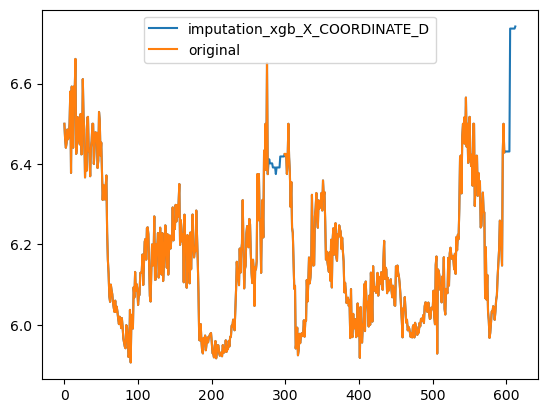

In [37]:
from xgboost.sklearn import XGBRegressor

reg = XGBRegressor().fit(x_train_X_COORDINATE_D,y_train_X_COORDINATE_D)

pred=reg.predict(x_test_X_COORDINATE_D)
pred=pred.reshape(-1,1)

c=0
for i in loss_index_X_COORDINATE_D:    
    xgb_data_loss_X_COORDINATE_D[i]=pred[c]
    c+=1
    

import matplotlib.pyplot as plt 

plt.plot(xgb_data_loss_X_COORDINATE_D,label='imputation_xgb_X_COORDINATE_D')
plt.plot(data_loss.iloc[:,1],label='original')
plt.legend()

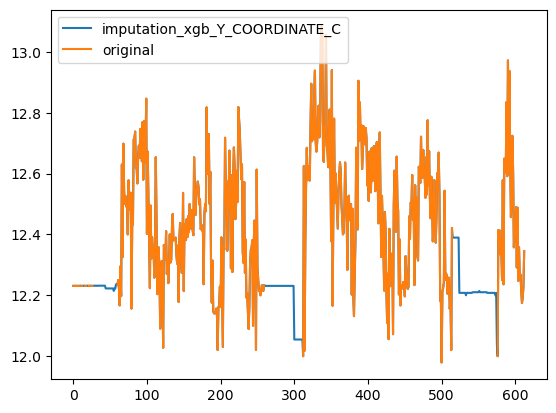

In [38]:
reg = XGBRegressor().fit(x_train_Y_COORDINATE_C,y_train_Y_COORDINATE_C)

pred=reg.predict(x_test_Y_COORDINATE_C)
pred=pred.reshape(-1,1)

c=0
for i in loss_index_Y_COORDINATE_C:    
    xgb_data_loss_Y_COORDINATE_C[i]=pred[c]
    c+=1
    

import matplotlib.pyplot as plt 

plt.plot(xgb_data_loss_Y_COORDINATE_C,label='imputation_xgb_Y_COORDINATE_C')
plt.plot(data_loss.iloc[:,2],label='original')
plt.legend()

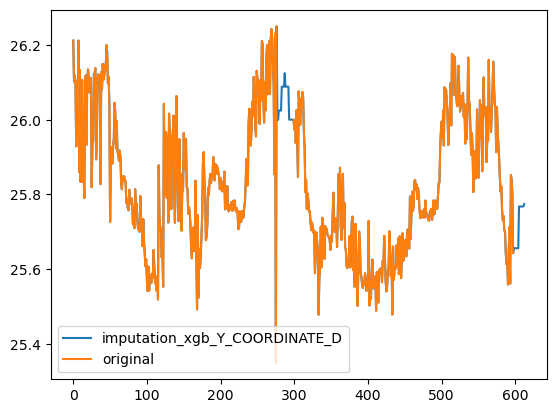

In [39]:
reg = XGBRegressor().fit(x_train_Y_COORDINATE_D,y_train_Y_COORDINATE_D)

pred=reg.predict(x_test_Y_COORDINATE_D)
pred=pred.reshape(-1,1)

c=0
for i in loss_index_Y_COORDINATE_D:    
    xgb_data_loss_Y_COORDINATE_D[i]=pred[c]
    c+=1
    

import matplotlib.pyplot as plt 

plt.plot(xgb_data_loss_Y_COORDINATE_D,label='imputation_xgb_Y_COORDINATE_D')
plt.plot(data_loss.iloc[:,3],label='original')
plt.legend()

In [40]:
print(x_train_X_COORDINATE_C.shape)

(464, 1)


Epoch 1/100
29/29 [==============================] - 0s 539us/step - loss: 37.6135
Epoch 2/100
29/29 [==============================] - 0s 444us/step - loss: 0.6914
Epoch 3/100
29/29 [==============================] - 0s 437us/step - loss: 0.2052
Epoch 4/100
29/29 [==============================] - 0s 418us/step - loss: 0.1801
Epoch 5/100
29/29 [==============================] - 0s 398us/step - loss: 0.1598
Epoch 6/100
29/29 [==============================] - 0s 399us/step - loss: 0.1380
Epoch 7/100
29/29 [==============================] - 0s 392us/step - loss: 0.1286
Epoch 8/100
29/29 [==============================] - 0s 395us/step - loss: 0.1177
Epoch 9/100
29/29 [==============================] - 0s 395us/step - loss: 0.1205
Epoch 10/100
29/29 [==============================] - 0s 394us/step - loss: 0.1117
Epoch 11/100
29/29 [==============================] - 0s 406us/step - loss: 0.0991
Epoch 12/100
29/29 [==============================] - 0s 415us/step - loss: 0.1003
Epoch 13/100

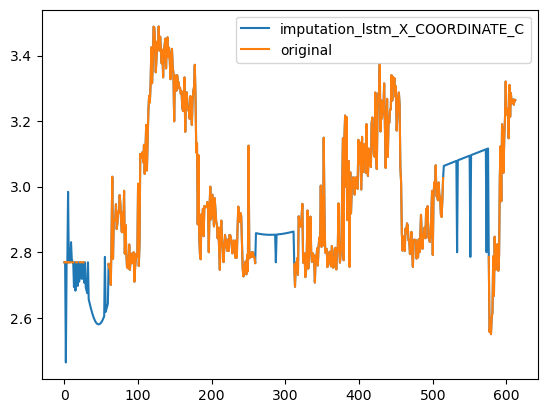

In [41]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(467, 1)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')

model.fit(x_train_X_COORDINATE_C,y_train_X_COORDINATE_C,epochs=100,batch_size=16)
pred=model.predict(x_test_X_COORDINATE_C)
pred=pred.reshape(-1,1)
c=0
for i in loss_index_X_COORDINATE_C:    
    lstm_data_loss_X_COORDINATE_C[i]=pred[c]
    c+=1
    
plt.plot(lstm_data_loss_X_COORDINATE_C,label='imputation_lstm_X_COORDINATE_C')
plt.plot(data_loss.iloc[:,0],label='original')
plt.legend()

In [42]:
print(x_train_X_COORDINATE_D.shape)

(579, 1)


Epoch 1/100
37/37 [==============================] - 0s 882us/step - loss: 16.5397
Epoch 2/100
37/37 [==============================] - 0s 594us/step - loss: 5.9062
Epoch 3/100
37/37 [==============================] - 0s 512us/step - loss: 2.4150
Epoch 4/100
37/37 [==============================] - 0s 462us/step - loss: 1.3776
Epoch 5/100
37/37 [==============================] - 0s 467us/step - loss: 1.0569
Epoch 6/100
37/37 [==============================] - 0s 478us/step - loss: 0.9010
Epoch 7/100
37/37 [==============================] - 0s 464us/step - loss: 0.7804
Epoch 8/100
37/37 [==============================] - 0s 463us/step - loss: 0.7048
Epoch 9/100
37/37 [==============================] - 0s 463us/step - loss: 0.6358
Epoch 10/100
37/37 [==============================] - 0s 463us/step - loss: 0.5818
Epoch 11/100
37/37 [==============================] - 0s 461us/step - loss: 0.5423
Epoch 12/100
37/37 [==============================] - 0s 461us/step - loss: 0.4987
Epoch 13/100

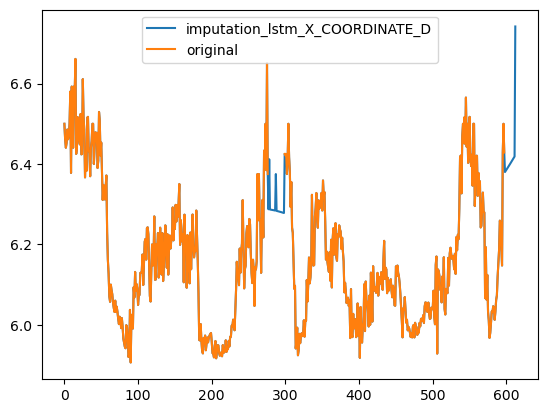

In [43]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(579, 1)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')

model.fit(x_train_X_COORDINATE_D,y_train_X_COORDINATE_D,epochs=100,batch_size=16)
pred=model.predict(x_test_X_COORDINATE_D)
pred=pred.reshape(-1,1)
c=0
for i in loss_index_X_COORDINATE_D:    
    lstm_data_loss_X_COORDINATE_D[i]=pred[c]
    c+=1
    
plt.plot(lstm_data_loss_X_COORDINATE_D,label='imputation_lstm_X_COORDINATE_D')
plt.plot(data_loss.iloc[:,1],label='original')
plt.legend()

In [44]:
print(x_train_Y_COORDINATE_C.shape)

(464, 1)


Epoch 1/464
29/29 [==============================] - 0s 707us/step - loss: 86.0096
Epoch 2/464
29/29 [==============================] - 0s 600us/step - loss: 26.6471
Epoch 3/464
29/29 [==============================] - 0s 543us/step - loss: 8.2520
Epoch 4/464
29/29 [==============================] - 0s 491us/step - loss: 4.9727
Epoch 5/464
29/29 [==============================] - 0s 429us/step - loss: 3.7863
Epoch 6/464
29/29 [==============================] - 0s 403us/step - loss: 3.3835
Epoch 7/464
29/29 [==============================] - 0s 407us/step - loss: 3.0612
Epoch 8/464
29/29 [==============================] - 0s 409us/step - loss: 2.8112
Epoch 9/464
29/29 [==============================] - 0s 404us/step - loss: 2.5699
Epoch 10/464
29/29 [==============================] - 0s 408us/step - loss: 2.4269
Epoch 11/464
29/29 [==============================] - 0s 400us/step - loss: 2.2357
Epoch 12/464
29/29 [==============================] - 0s 403us/step - loss: 2.1193
Epoch 13/46

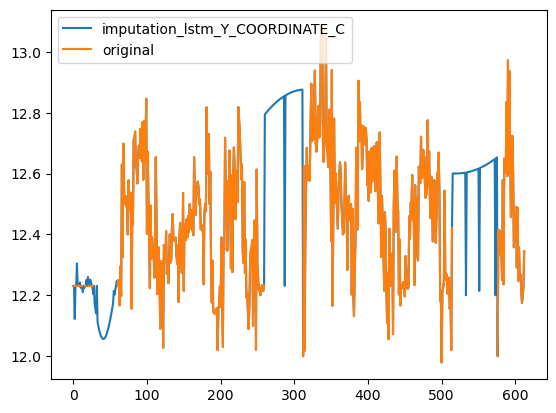

In [45]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(579, 1)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')

model.fit(x_train_Y_COORDINATE_C,y_train_Y_COORDINATE_C,epochs=464,batch_size=16)
pred=model.predict(x_test_Y_COORDINATE_C)
pred=pred.reshape(-1,1)
c=0
for i in loss_index_Y_COORDINATE_C:    
    lstm_data_loss_Y_COORDINATE_C[i]=pred[c]
    c+=1
    
plt.plot(lstm_data_loss_Y_COORDINATE_C,label='imputation_lstm_Y_COORDINATE_C')
plt.plot(data_loss.iloc[:,2],label='original')
plt.legend()

Epoch 1/579
37/37 [==============================] - 1s 600us/step - loss: 242.5004
Epoch 2/579
37/37 [==============================] - 0s 517us/step - loss: 174.5642
Epoch 3/579
37/37 [==============================] - 0s 489us/step - loss: 137.8441
Epoch 4/579
37/37 [==============================] - 0s 455us/step - loss: 64.5150
Epoch 5/579
37/37 [==============================] - 0s 460us/step - loss: 39.6803
Epoch 6/579
37/37 [==============================] - 0s 453us/step - loss: 33.8798
Epoch 7/579
37/37 [==============================] - 0s 454us/step - loss: 30.3224
Epoch 8/579
37/37 [==============================] - 0s 466us/step - loss: 27.5371
Epoch 9/579
37/37 [==============================] - 0s 456us/step - loss: 24.9518
Epoch 10/579
37/37 [==============================] - 0s 452us/step - loss: 22.9885
Epoch 11/579
37/37 [==============================] - 0s 453us/step - loss: 21.3051
Epoch 12/579
37/37 [==============================] - 0s 455us/step - loss: 19.215

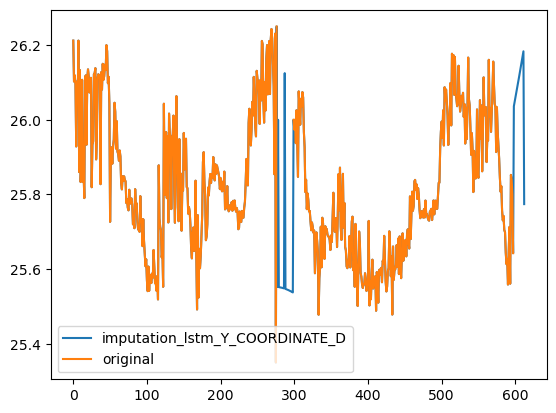

In [46]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(579, 1)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')

model.fit(x_train_Y_COORDINATE_D,y_train_Y_COORDINATE_D,epochs=579,batch_size=16)
pred=model.predict(x_test_Y_COORDINATE_D)
pred=pred.reshape(-1,1)
c=0
for i in loss_index_Y_COORDINATE_D:    
    lstm_data_loss_Y_COORDINATE_D[i]=pred[c]
    c+=1
    
plt.plot(lstm_data_loss_Y_COORDINATE_D,label='imputation_lstm_Y_COORDINATE_D')
plt.plot(data_loss.iloc[:,3],label='original')
plt.legend()

5/5 [==============================] - 0s 388us/step


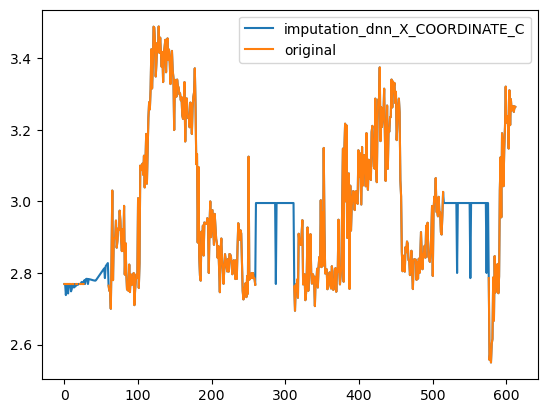

In [47]:
from keras import models, layers
from tensorflow.keras import layers, models


def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu', input_shape=(1, )))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

dnn=build_model()
dnn.fit(x_train_X_COORDINATE_C,y_train_X_COORDINATE_C,epochs=100,batch_size=1,verbose=0)

pred=dnn.predict(x_test_X_COORDINATE_C)
pred=pred.reshape(-1,1)

c=0
for i in loss_index_X_COORDINATE_C:    
    dnn_data_loss_X_COORDINATE_C[i]=pred[c]
    c+=1
    
plt.plot(dnn_data_loss_X_COORDINATE_C,label='imputation_dnn_X_COORDINATE_C')
plt.plot(data_loss.iloc[:,0],label='original')
plt.legend()

2/2 [==============================] - 0s 859us/step


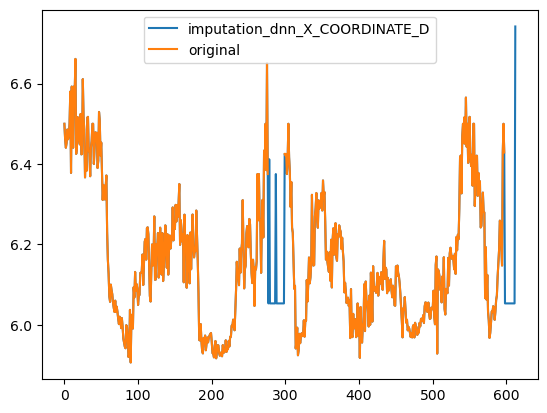

In [48]:
dnn=build_model()
dnn.fit(x_train_X_COORDINATE_D,y_train_X_COORDINATE_D,epochs=100,batch_size=1,verbose=0)

pred=dnn.predict(x_test_X_COORDINATE_D)
pred=pred.reshape(-1,1)

c=0
for i in loss_index_X_COORDINATE_D:    
    dnn_data_loss_X_COORDINATE_D[i]=pred[c]
    c+=1
    
plt.plot(dnn_data_loss_X_COORDINATE_D,label='imputation_dnn_X_COORDINATE_D')
plt.plot(data_loss.iloc[:,1],label='original')
plt.legend()

5/5 [==============================] - 0s 390us/step


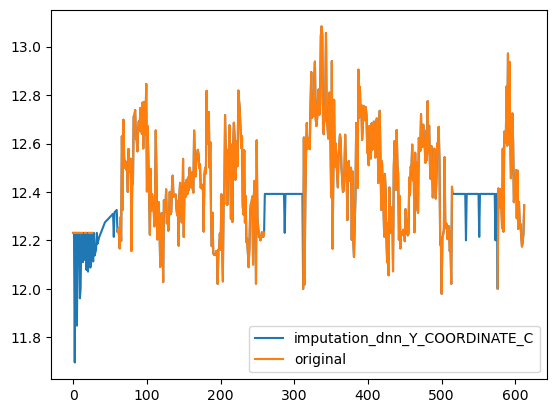

In [49]:
dnn=build_model()
dnn.fit(x_train_Y_COORDINATE_C,y_train_Y_COORDINATE_C,epochs=100,batch_size=1,verbose=0)

pred=dnn.predict(x_test_Y_COORDINATE_C)
pred=pred.reshape(-1,1)

c=0
for i in loss_index_Y_COORDINATE_C:    
    dnn_data_loss_Y_COORDINATE_C[i]=pred[c]
    c+=1
    
plt.plot(dnn_data_loss_Y_COORDINATE_C,label='imputation_dnn_Y_COORDINATE_C')
plt.plot(data_loss.iloc[:,2],label='original')
plt.legend()

2/2 [==============================] - 0s 972us/step


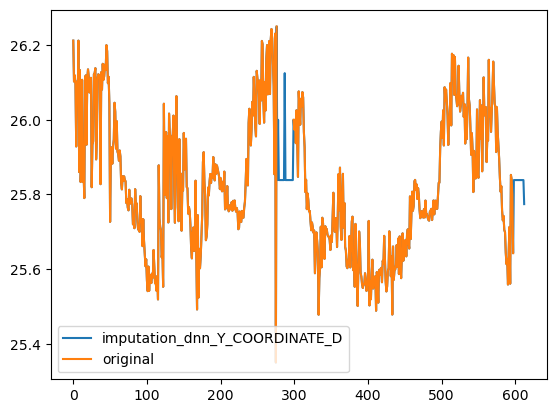

In [50]:
dnn=build_model()
dnn.fit(x_train_Y_COORDINATE_D,y_train_Y_COORDINATE_D,epochs=100,batch_size=1,verbose=0)

pred=dnn.predict(x_test_Y_COORDINATE_D)
pred=pred.reshape(-1,1)

c=0
for i in loss_index_Y_COORDINATE_D:    
    dnn_data_loss_Y_COORDINATE_D[i]=pred[c]
    c+=1
    
plt.plot(dnn_data_loss_Y_COORDINATE_D,label='imputation_dnn_Y_COORDINATE_D')
plt.plot(data_loss.iloc[:,3],label='original')
plt.legend()

In [51]:
data_loss.columns

Index(['X COORDINATE_C(Left)', 'X COORDINATE_D(Heel)', 'Y COORDINATE_C(Left)',
       'Y COORDINATE_D(Heel)'],
      dtype='object')

In [52]:
index=data_loss.index
c=0
for j in loss_index_X_COORDINATE_C:
    data_loss['X COORDINATE_C(Left)'][j]=xgb_data_loss_X_COORDINATE_C[c]
    c+=1
    
index=data_loss.index
c=0
for j in loss_index_X_COORDINATE_D:
    data_loss['X COORDINATE_D(Heel)'][j]=xgb_data_loss_X_COORDINATE_D[c]
    c+=1
    

    

c=0
for j in loss_index_Y_COORDINATE_C:
    data_loss['Y COORDINATE_C(Left)'][j]=xgb_data_loss_Y_COORDINATE_C[c]
    c+=1
    
    
c=0
for j in loss_index_Y_COORDINATE_D:
    data_loss['Y COORDINATE_D(Heel)'][j]=xgb_data_loss_Y_COORDINATE_D[c]
    c+=1

data_loss.to_excel("sts_data_xgb_interpolation.xlsx")

In [53]:
index=data_loss.index
c=0
for j in loss_index_X_COORDINATE_C:
    data_loss['X COORDINATE_C(Left)'][j]=lstm_data_loss_X_COORDINATE_C[c]
    c+=1
    
index=data_loss.index
c=0
for j in loss_index_X_COORDINATE_D:
    data_loss['X COORDINATE_D(Heel)'][j]=lstm_data_loss_X_COORDINATE_D[c]
    c+=1
    

    

c=0
for j in loss_index_Y_COORDINATE_C:
    data_loss['Y COORDINATE_C(Left)'][j]=lstm_data_loss_Y_COORDINATE_C[c]
    c+=1
    
    
c=0
for j in loss_index_Y_COORDINATE_D:
    data_loss['Y COORDINATE_D(Heel)'][j]=lstm_data_loss_Y_COORDINATE_D[c]
    c+=1

data_loss.to_excel("sts_data_lstm_interpolation.xlsx")

In [54]:
index=data_loss.index
c=0
for j in loss_index_X_COORDINATE_C:
    data_loss['X COORDINATE_C(Left)'][j]=dnn_data_loss_X_COORDINATE_C[c]
    c+=1
    
index=data_loss.index
c=0
for j in loss_index_X_COORDINATE_D:
    data_loss['X COORDINATE_D(Heel)'][j]=dnn_data_loss_X_COORDINATE_D[c]
    c+=1
    

    

c=0
for j in loss_index_Y_COORDINATE_C:
    data_loss['Y COORDINATE_C(Left)'][j]=dnn_data_loss_Y_COORDINATE_C[c]
    c+=1
    
    
c=0
for j in loss_index_Y_COORDINATE_D:
    data_loss['Y COORDINATE_D(Heel)'][j]=dnn_data_loss_Y_COORDINATE_D[c]
    c+=1

data_loss.to_excel("sts_data_dnn_interpolation.xlsx")